In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read the dataset into python enviornment

In [3]:
df=pd.read_csv(r'D:\car_age_price.csv')

In [4]:
df


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


##Check the basic details about dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
df.shape

(112, 2)

In [8]:
df.isna().sum()

Year     0
Price    0
dtype: int64

##Find the correlation matrix and display heatmap

In [9]:
corr_matrix=df.corr()

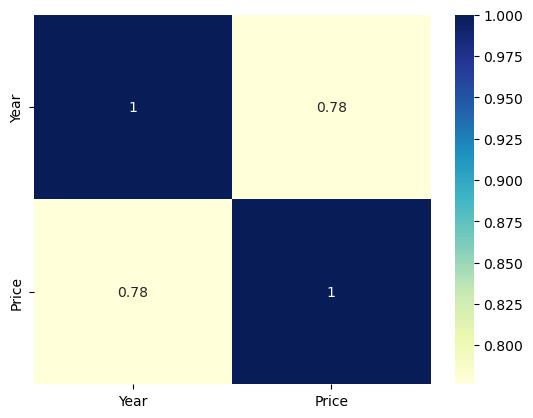

In [10]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

##Separate the features(year)and target variable(price)

In [11]:
x = df[['Year']]
y = df['Price']

In [12]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [13]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

##Split the dataset into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [17]:
y_train

66     525000
90     520000
62     540000
22     434999
85     320000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 89, dtype: int64

##Create and train the Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression,Lasso
lin_regressor=LinearRegression()
model=lin_regressor.fit(x_train,y_train)

##Create and train the Lasso Regression Model

In [20]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.1)

##Make predictions using the trained models

In [21]:
predictions=model.predict(x_test)

In [22]:
year_2022 = [[2022]]

lin_regressor_pred = lin_regressor.predict(year_2022)
lasso_reg_pred = lasso_reg.predict(year_2022)

C:\Users\ksvis\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ksvis\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


##Evaluate the models using mean squared error

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
lin_regressor_mse = mean_squared_error(y_test, lin_regressor.predict(x_test))
lasso_reg_mse = mean_squared_error(y_test, lasso_reg.predict(x_test))

##Print the predicted prices and MSE of both models

In [26]:
print("Linear Regression Prediction for 2022 Model: ", lin_regressor_pred[0])
print("Lasso Regression Prediction for 2022 Model: ", lasso_reg_pred[0])
print("Linear Regression MSE:", lin_regressor_mse)
print("Lasso Regression MSE:", lasso_reg_mse)


Linear Regression Prediction for 2022 Model:  743601.6159450412
Lasso Regression Prediction for 2022 Model:  743601.3917776793
Linear Regression MSE: 4326906256.829671
Lasso Regression MSE: 4326901608.19506
